# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

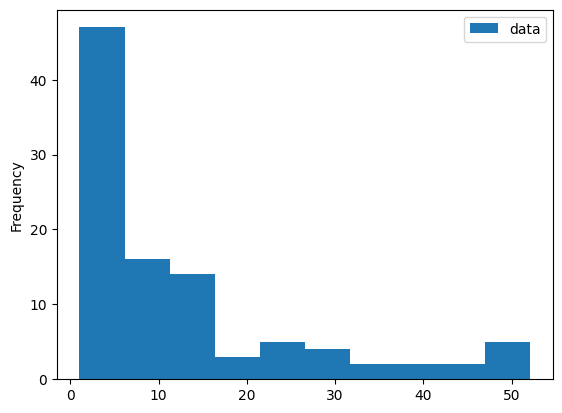

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

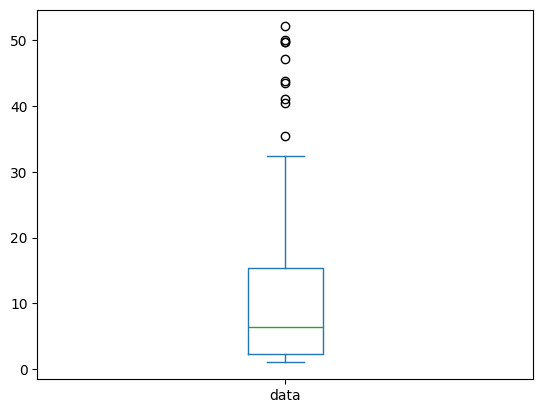

In [3]:
df.plot.box()

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [4]:
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
data_path = kagglehub.dataset_download("khusheekapoor/vehicle-insurance-fraud-detection")
file = os.path.join(data_path, "carclaims.csv")
df = pd.read_csv(file)
print("Vehicle Insurance Fraud Detection Sample:")
print(df.head())

100%|██████████| 349k/349k [00:00<00:00, 13.7MB/s]

Extracting files...
Vehicle Insurance Fraud Detection Sample:
  Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  \
0          Jan                   1  Female        Single  ...   
1          Jan                   4    Male        Single  ...   
2          Nov                   2    Male       Married  ...   
3          Jul                   1    Male       Married  ...   
4          Feb                   2  Female        Single  ...   

   AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0           26 to 30                No   

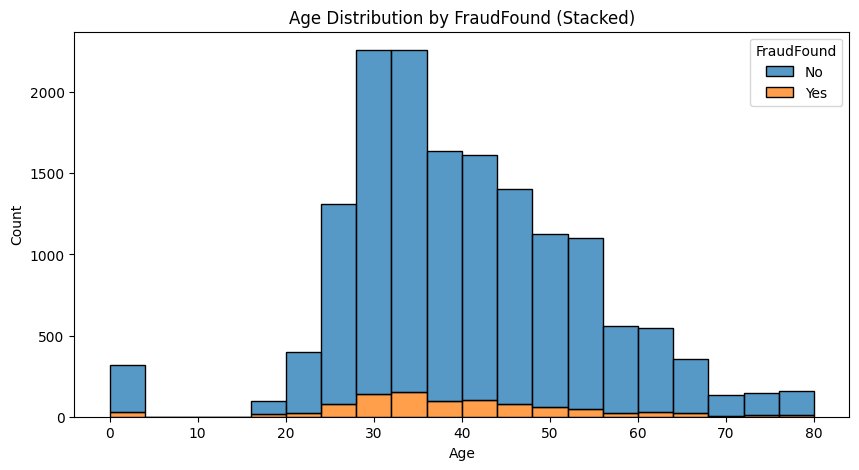

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 83.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 90.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 17.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


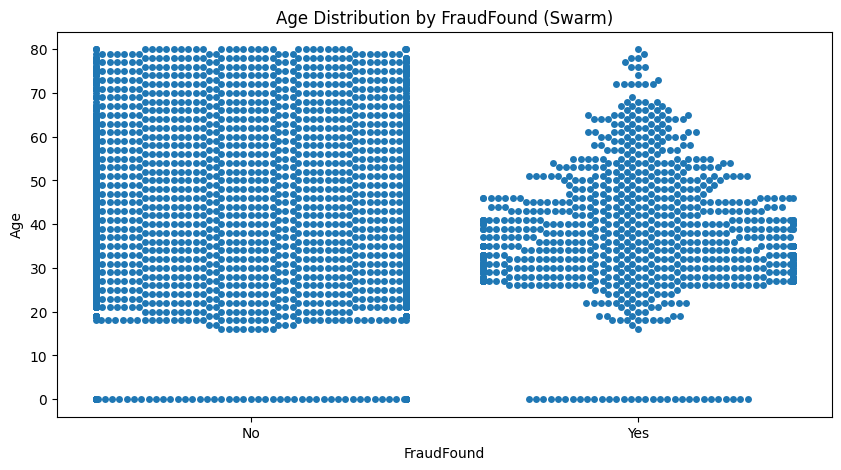

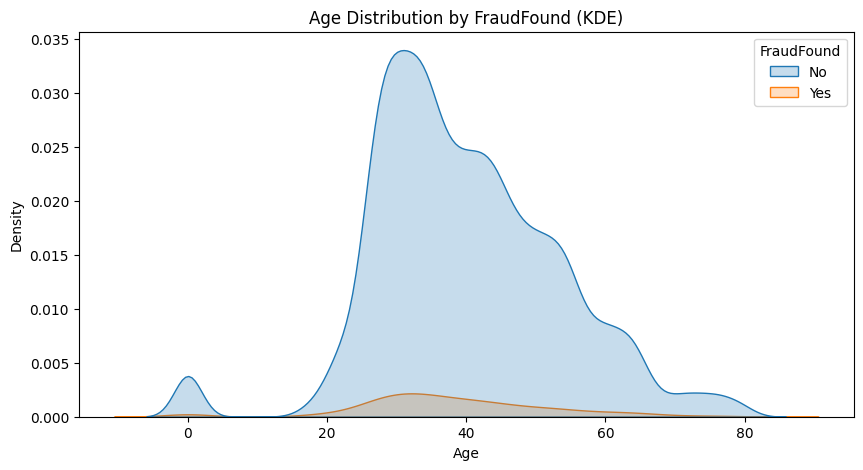

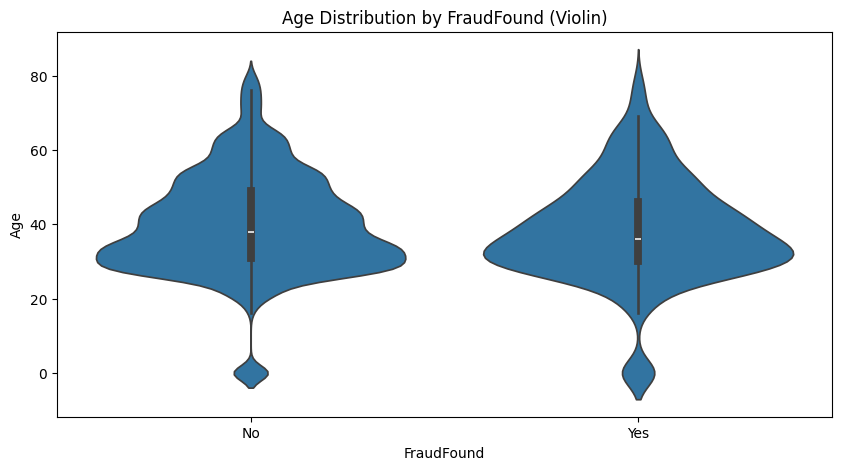

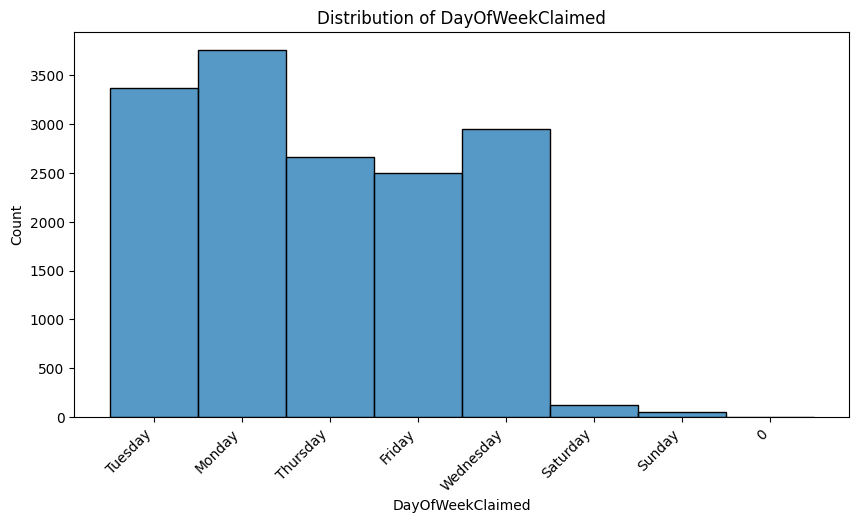

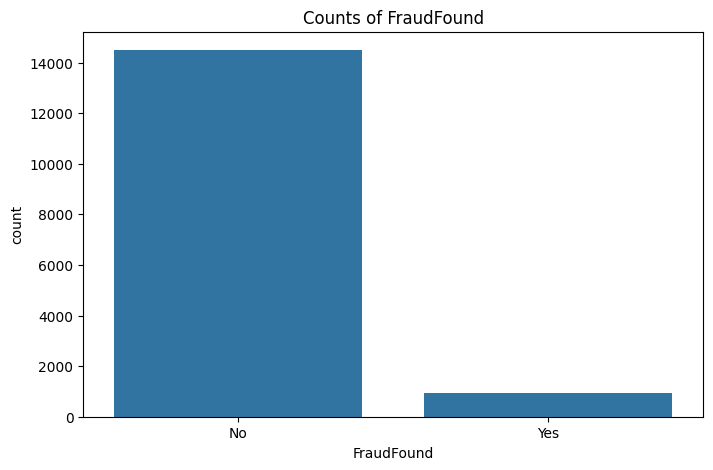

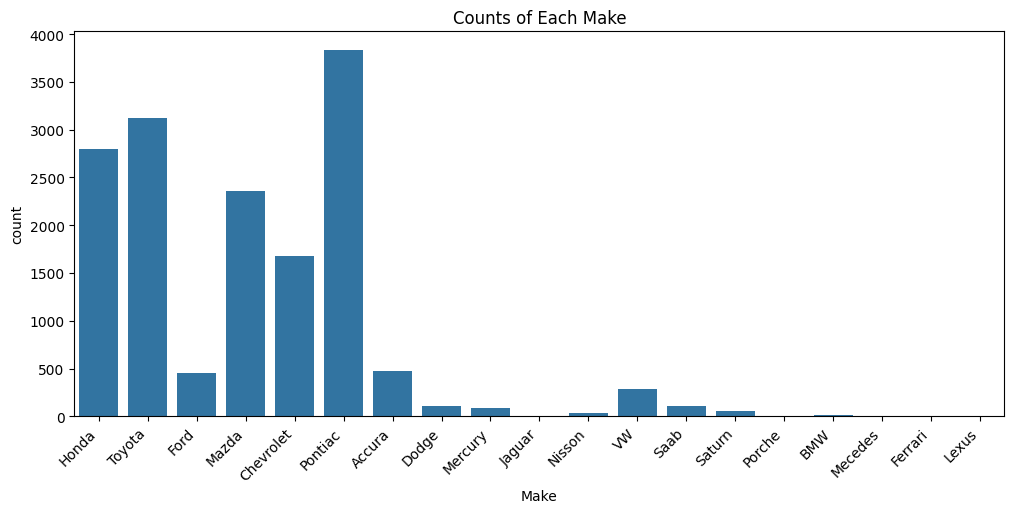

Age Statistics:
count    15420.000000
mean        39.855707
std         13.492377
min          0.000000
25%         31.000000
50%         38.000000
75%         48.000000
max         80.000000
Name: Age, dtype: float64
Median Age: 38.0
Mode Age: 0    30
Name: Age, dtype: int64

FraudFound Statistics:
FraudFound
No     14497
Yes      923
Name: count, dtype: int64


In [ ]:
# Age distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="Age", hue="FraudFound", bins=20, multiple="stack")
plt.title("Age Distribution by FraudFound (Stacked)")
plt.show()

# Swarm plot for Age
plt.figure(figsize=(10, 5))
sns.swarmplot(data=df, x="FraudFound", y="Age")
plt.title("Age Distribution by FraudFound (Swarm)")
plt.show()

# KDE plot for Age by FraudFound
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x="Age", hue="FraudFound", fill=True)
plt.title("Age Distribution by FraudFound (KDE)")
plt.show()

# Violin plot for Age by FraudFound
plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x="FraudFound", y="Age")
plt.title("Age Distribution by FraudFound (Violin)")
plt.show()


plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="DayOfWeekClaimed")
plt.title("Distribution of DayOfWeekClaimed")
plt.xticks(rotation=45, ha='right')
plt.show()



# 3. Bar Plots for Categorical Variables

# FraudFound Counts
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="FraudFound")
plt.title("Counts of FraudFound")
plt.show()

# Make Counts
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x="Make")
plt.title("Counts of Each Make")
plt.xticks(rotation=45, ha='right')
plt.show()

# 4. Descriptive Statistics (Means, Medians, Modes)

# Numerical Features (e.g., Age)
print("Age Statistics:")
print(df["Age"].describe())
print("Median Age:", df["Age"].median())
print("Mode Age:", df["Age"].mode())

# Categorical Features (e.g., FraudFound)
print("\nFraudFound Statistics:")
print(df["FraudFound"].value_counts())


- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!
    - The data seems usabale for hte most part, no glaring inconsistencies or missing values based onhte statistics

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?
    - the Age distribution is a little left skewed, in a way that there is more older age distribution(above 20) than younger

- Are there any outliers present?  (Data points that are far from the others.)
    - There are some potential outliers on the higher end
- If there are multiple related histograms, how does the distribution change across different groups?
    - So bsed on multiple histograms made on fraud cases, we can see that htere is a class imbalance between the fraud cases and non-fraud cases. And for the counts of each fraud make, Pontiac, Toyota and Honda are the top three most common brnad for hte fraud cases on.
- What are the minimum and maximum values represented in each histogram?
    - For the Age statistics, the maximum is 80, and minimum is 0
    - For Fraud Made graph, the maximum is a little less than 4000 and the minimum is 0
- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?
    - As we don't have too many features, changing the bin sizes in the histograms don't significantly hide or reveal patterns
- Does the distribution appear normal, or does it have a different distribution?
    - The distribtions appear normal

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

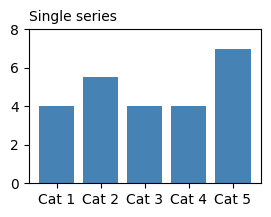

In [11]:
import matplotlib.pyplot as plt

categories = ['Cat 1', 'Cat 2', 'Cat 3', 'Cat 4', 'Cat 5']
values = [4, 5.5, 4, 4, 7]

fig, ax = plt.subplots(figsize=(3, 2))  
ax.bar(categories, values, color="steelblue")
ax.set_title("Single series", fontsize=10, loc='left')
ax.set_ylim(0, 8) 

plt.show()
